# Investigating the Titanic Dataset

The main goal is to find out which factors made people more likeliy to survive. There are three main aspects I wanted to explore: passenger class, age and sex, because I thought, most of these factors can be found here.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath_string = "titanic-data.csv"

In [3]:
titanic_data = pd.read_csv(filepath_string)

First I wanted to plot out the numbers of passengers who survived and who didn't grouped by the class. I converted the 'Survived'-column from integers to booleans for better display in the plot. Maybe I would find some interesting information there.

In [4]:
d = {0: False, 1: True}
survived_bool = titanic_data['Survived'].map(d)
titanic_data['Survived'] = survived_bool
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Passenger class

I tried to find out how many passengers were in each ticket class. After that, I created a grouped bar chart to show, how many passengers of each class survived.

In [5]:
#print out the total number of passengers in this dataset and the number of
#passengers in each class and the percentages

num_total = len(titanic_data)
print("Total passengers: " + str(num_total))


def calculate_passengers(data, search_pattern, value):
    number = len(data.loc[data[search_pattern] == value])
    percent = round(number/num_total * 100, 2)
    #print("Ticket class " + str(value) + ": " + str(number) +  " (" + str(percent) + "%)")
    return str(number) +  " (" + str(percent) + "%)"
    
print("Ticket class 1: " + (calculate_passengers(titanic_data, "Pclass", 1)))
print("Ticket class 2: " + (calculate_passengers(titanic_data, "Pclass", 2)))
print("Ticket class 3: " + (calculate_passengers(titanic_data, "Pclass", 3)))


Total passengers: 891
Ticket class 1: 216 (24.24%)
Ticket class 2: 184 (20.65%)
Ticket class 3: 491 (55.11%)


In [6]:
#store the different classes in variables for further investigation
class_1 = titanic_data.loc[titanic_data["Pclass"] == 1]
class_2 = titanic_data.loc[titanic_data["Pclass"] == 2]
class_3 = titanic_data.loc[titanic_data["Pclass"] == 3]

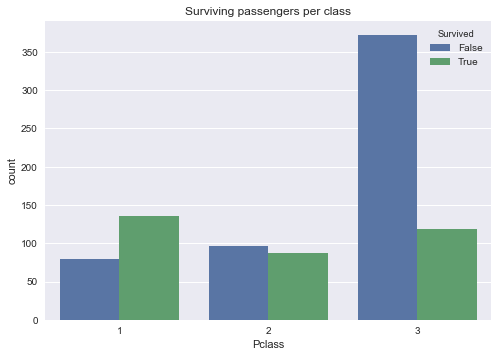

In [10]:
#plot out how many passengers survived/died in a grouped bar chart
ax = sns.countplot(x="Pclass", hue="Survived", data=titanic_data).set_title("Surviving passengers per class")
plt.show()

In [70]:
# print out the numbers and percentages of passengers for each class who survived/died
titanic_data.loc[titanic_data["Pclass"] == 1]
def get_passengers_for_class(class_value, search_pattern, survived):
    passengers = titanic_data.loc[titanic_data["Pclass"] == class_value]
    print(str(survived) + ": " + (calculate_passengers(passengers, search_pattern, survived)))

#overall percentages are taken
print("Class 1 survived:")
get_passengers_for_class(1, "Survived", True)
get_passengers_for_class(1, "Survived", False)
print("Class 2 survived:")
get_passengers_for_class(2, "Survived", True)
get_passengers_for_class(2, "Survived", False)
print("Class 3 survived:")
get_passengers_for_class(3, "Survived", True)
get_passengers_for_class(3, "Survived", False)

Class 1 survived:
True: 136 (15.26%)
False: 80 (8.98%)
Class 2 survived:
True: 87 (9.76%)
False: 97 (10.89%)
Class 3 survived:
True: 119 (13.36%)
False: 372 (41.75%)


Most passengers in this dataset came from class 3 (about 55%) and most passengers who died came from class 3 as well (about 42% of all the passengers). Class 3 passengers were less likely to get into a lifeboat


## 2. Age

The next thing I investigated was the age. First I tried to find out how the age was distributed among the different passenger classes. I needed to clean the data for missing values in the "age"-column. Cleaning the data proved to be not so easy. Replacing the missing values with another value like the mean didn't seem reasonable to me, because it would confuse the plots for the distributions. One could draw wrong conclusions from that. So I decided to drop the missing values.<br>
First I wanted to look at some statistical values if there were any abnormalities.

In [71]:
print("Means:")
print(titanic_data.loc[titanic_data["Pclass"] == 1].Age.mean())
print(titanic_data.loc[titanic_data["Pclass"] == 2].Age.mean())
print(titanic_data.loc[titanic_data["Pclass"] == 3].Age.mean())
print("Standard deviations:")
print(titanic_data.loc[titanic_data["Pclass"] == 1].Age.std())
print(titanic_data.loc[titanic_data["Pclass"] == 2].Age.std())
print(titanic_data.loc[titanic_data["Pclass"] == 3].Age.std())

Means:
38.233440860215055
29.87763005780347
25.14061971830986
Standard deviations:
14.80285589645046
14.001076812476201
12.495398210982415


I could not find anything interesting in these values. The mean for class 1 is higher than for class 2 which is higher than class 3. Taking into account, that the tickets for class 2 and 3 are more expensive and might already be a little older to have earned enough money to afford this, this seems not too unusual.
So I plotted out the distributions.

In [74]:
print(len(titanic_data.loc[titanic_data["Pclass"] == 1].Age.dropna()))
print(len(titanic_data.loc[titanic_data["Pclass"] == 2].Age.dropna()))
print(len(titanic_data.loc[titanic_data["Pclass"] == 3].Age.dropna()))

186
173
355


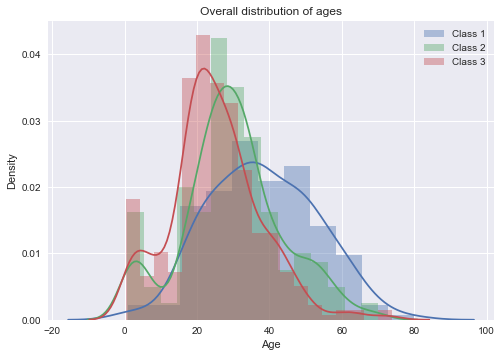

In [16]:
#for all calcultations concerning the age, I had to leave out those passengers, where no age was recorded.
# I did so by using dropna() on the age.
def plot_age_distribution(input):
    x = titanic_data.loc[titanic_data["Pclass"] == input].Age.dropna()
    ax = sns.distplot(x, label="Class " + str(input)).set_title("Overall distribution of ages")
    plt.ylabel("Density")
    plt.legend()
    
plot_age_distribution(1)
plot_age_distribution(2)
plot_age_distribution(3)

The findings here are much more interesting. While the age in class 1 is normally distributed with a mean about 40 years and with very fes children, in the classes 2 and 3 on the other hand, there were many children on board. So I started to look at the different classes separately. For each class I wanted to know, how many children survived.

In [17]:
#function for plotting out the distribution of ages for one class
def distribution_for_class(class_str, class_int):
    class_str = titanic_data.loc[titanic_data["Pclass"] == class_int]
    died = class_str.loc[class_str["Survived"] == False].Age.dropna()
    survived = class_str.loc[class_str["Survived"] == True].Age.dropna()
    sns.distplot(died, label="Died").set_title("Age distribution for class "+str(class_int))
    sns.distplot(survived, label="Survived")
    plt.ylabel("Density")
    plt.legend()

##### Distribution of the age for class 1

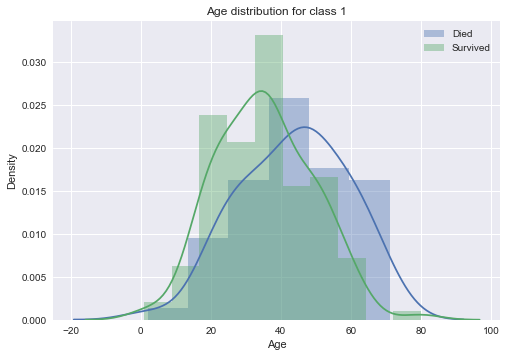

In [18]:
#create a diagram to show the diffences in the distribution of ages in class 3 between those who survived and
#those who died
distribution_for_class("class_1", 1)

In class 1 the distributions for those who survived and died both follow the overall distribution for class 1.

##### Distribution of the age for class 2

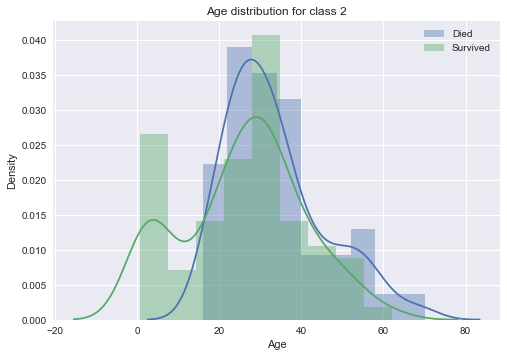

In [19]:
distribution_for_class("class_2", 2)

In class 2 all children survived.

##### Distribution of the age for class 3

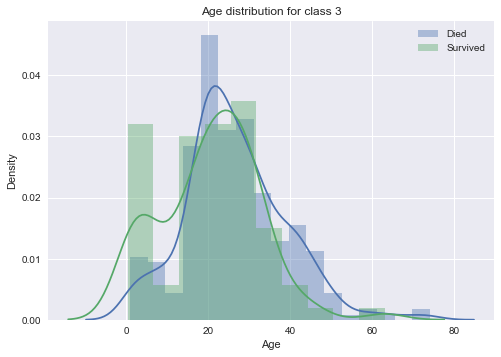

In [20]:
distribution_for_class("class_3", 3)

In class 3 still a lot of children survived, though not as many as in class 2. I want to know the overall percentage of the children who survived. I included only children who were 14 years and below.

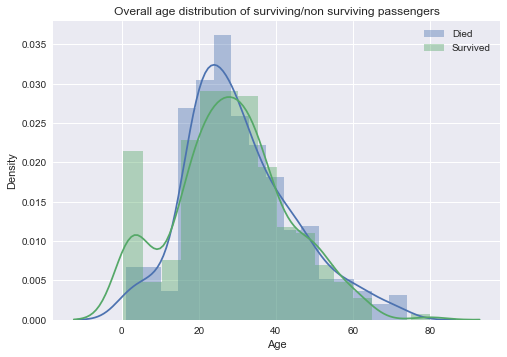

In [21]:
died = titanic_data.loc[titanic_data["Survived"] == False].Age.dropna()
survived = titanic_data.loc[titanic_data["Survived"] == True].Age.dropna()
sns.distplot(died, label="Died").set_title("Overall age distribution of surviving/non surviving passengers")
sns.distplot(survived, label="Survived")
plt.ylabel("Density")
plt.legend()

In [85]:
under_14 = titanic_data.loc[titanic_data["Age"] <= 14]
#class_1 = under_14.loc[under_14["Pclass"] == 1]
#class_2 = under_14.loc[under_14["Pclass"] == 2]
#class_3 = under_14.loc[under_14["Pclass"] == 3]
survived = len(under_14.loc[under_14["Survived"] == True])
died = len(under_14.loc[under_14["Survived"] == False])
percent_survived = round((survived/len(under_14)*100), 2)

print("Of the "+str(len(under_14))+" children under 14 on board of the ship "
      +str(survived)+", which is a perventage of "+str(percent_survived)+".")

Of the 77 children under 14 on board of the ship 45, which is a perventage of 58.44.


## 3. Sex

In [86]:
# function takes in the data for the three different classes we defined earlier and calculates the percentage
# of male and female passengers who survived
   
def percentage_survived_by_sex(data):
    male = data.loc[data["Sex"] == "male"]
    female = data.loc[data["Sex"] == "female"]
    num_male = len(male)
    num_female = len(female)
    male_survived = male.loc[male["Survived"] == True]
    female_survived = female.loc[female["Survived"] == True]
    num_male_survived = len(male_survived)
    num_female_survived = len(female_survived)
    percent_male = round(num_male_survived/num_male * 100, 2)
    percent_female = round(num_female_survived/num_female * 100, 2)
    print("From this class, "+str(percent_male)+"% of male passengers and "+str(percent_female)+"% of female passengers survived.")

print("Class 1:")
percentage_survived_by_sex(class_1)
print("Class 2:")
percentage_survived_by_sex(class_2)
print("Class 3:")
percentage_survived_by_sex(class_3)


Class 1:
From this class, 36.89% of male passengers and 96.81% of female passengers survived.
Class 2:
From this class, 15.74% of male passengers and 92.11% of female passengers survived.
Class 3:
From this class, 13.54% of male passengers and 50.0% of female passengers survived.


Though the female passengers were far less in numbers compared to the male passengers, the percentage of those who survived is far higher.

## Conclusion

All three factors that were investigated seemed to have an impact on the likeliness to survive. We found out that class 1 and class 2 passengers were more likely to survive than class 3 passengers.
Many of the women and children were rescued which leads to the conclusion that the code of conduct "women and children first" was followed.
There are limitations in this analysis. The data is incomplete when it comes to the age of the passengers. For some of them, no age has been recorded. So the results might not correctly represent the real distributions.
The sample completely leaves out the crew that was on board, because they would not fall into one of the three ticket classes. So the results might not be applied to the popultion at all, because we have no Information about the crew.

## Resources

For creating this submission, I used the documentation pages of Pandas, matplotlib.pyplot and seaborn:<br>
http://pandas.pydata.org/pandas-docs/stable/ <br>
https://matplotlib.org/2.0.2/index.html <br>
https://seaborn.pydata.org/ <br>
For the plots i referred to the examples of the seaborn documentation page.
I also used the some of the videos from the youtube channel dataschool as a refresher for some methods concerning dataframes:<br>
https://www.youtube.com/user/dataschool